In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式

In [90]:
# 打开json文件
path = "/data/users/gaoli/exp_Robust/datasets/json/Packets/all_packet_sizes_CIC_4Portscan.json"
with open(path, "r") as f:
    data = json.load(f)
print(data[:10])

[-66, 60, -60, -261, 60, 1514, 1582, -60, -180, 105]


In [111]:
data.extend(data)

In [97]:
path = "/data/users/gaoli/exp_Robust/datasets/json/Packets/all_packet_sizes_CIC_Normal.json"
with open(path, "r") as f:
    data_normal = json.load(f)

In [98]:
path = "/data/users/gaoli/exp_Robust/datasets/json/packet_size_pdf_private.json"
with open(path, "r") as f:
    data = json.load(f)

In [112]:
print(len(data))

4096000


In [92]:
data.extend(data_normal)

In [93]:
mtu = 3000
for i in range(len(data)):
    if data[i] > mtu:
        data[i] = mtu
    elif data[i] < -mtu:
        data[i] = -mtu
    else:
        pass

In [95]:
# 从data中采样100个
import random
data = random.sample(data, 4000)

/tmp/ipykernel_1996871/3760275676.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='#7BB7D8',bw_adjust=bw_adjust)


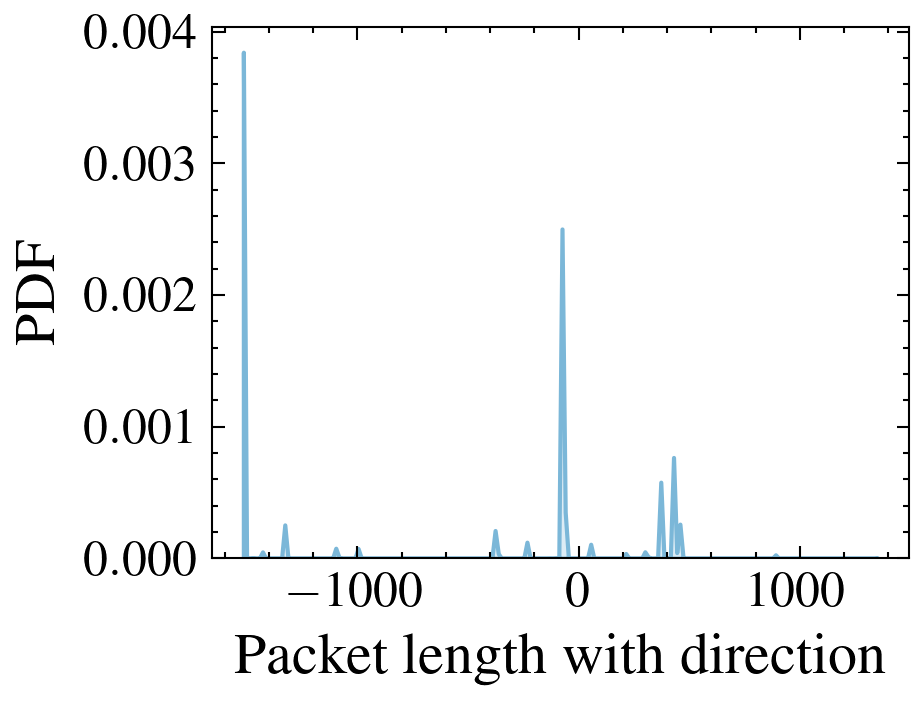

In [113]:

plt.figure(figsize=(3, 2.3),dpi=300) # 设置画布大小
# 使用 seaborn的核密度估计KDE 绘制 PDF 曲线
bw_adjust =0.01#  the bandwidth of the kernel.
sns.kdeplot(data, shade=True, color='#7BB7D8',bw_adjust=bw_adjust)

# sns.histplot(data, kde=True, bins=len(set(data))) #  edgecolor='black'
plt.xlabel('Packet length with direction',fontsize=14) # x轴标签
# 设置x轴标签
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('PDF',fontsize=14) # y轴标签
# plt.ylabel('PDF') # y轴标签
# plt.title('PDF of packet length with direction') # 标题 


# plt.legend()
# plt.axvline(x=threshold, color='black', linestyle='--', label=f'10th Percentile Threshold:{threshold:.4f}')
# plt.legend(['train: benign', 'train: malicious',f'threshold:{threshold:.4f}'])

plt.show()
